<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/04-Matplotlib/Seaborn_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Pokemon.csv',encoding= 'unicode_escape')

In [5]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [6]:
data.shape

(151, 13)

In [7]:
#Dataset Description

#This data set includes 150 Pokemon, including their number, name, first and second type, 
                        #and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. 


#This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

#The data as described by Myles O'Neill is:

#: ID for each pokemon
# Name: Name of each pokemon
# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
# Type 2: Some pokemon are dual type and have 2
# Total: sum of all stats that come after this, a general guide to how strong a pokemon is
# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
# Attack: the base modifier for normal attacks (eg. Scratch, Punch)
# Defense: the base damage resistance against normal attacks
# SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
# SP Def: the base damage resistance against special attacks
# Speed: determines which pokemon attacks first each round
# Stage : Number of Generation
#Legendary : True if Legendary Pokemon , False if not 

# The data for this table has been acquired from several different sites, including:
#pokemon.com
# pokemondb
# bulbapedia

#One question has been answered with this database: 
    #The type of a pokemon cannot be inferred only by it's Attack and Deffence. 
    #It would be worthy to find which two variables can define the type of a pokemon, if any. 
    #Two variables can be plotted in a 2D space, and used as an example for machine learning. 
    #This could mean the creation of a visual example any geeky Machine Learning class would love.


In [8]:
#lets rename the column to make more sense in data coloumn name while plotting

data.rename(columns = {"#":"No.","Type 1":"Pokemon_Type","Type 2":"PokemonType2",'Total':'Sum of Attack',"HP":"Hit Points","Attack" : "Attack Strength", "Defense":"Defensive Strength","Sp. Atk":"Special Attack Stenth","Sp. Def":"Special Defense Strength","Stage":"Generation"}, inplace = True)
data.head()

,No.,Name,Pokemon_Type,PokemonType2,Sum of Attack,Hit Points,Attack Strength,Defensive Strength,Special Attack Stenth,Special Defense Strength,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


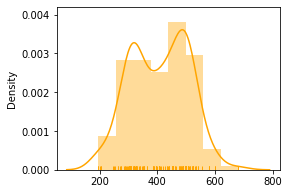

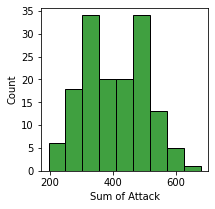

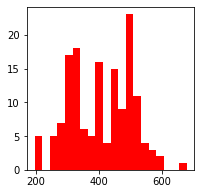

In [9]:
#lets analyze the distribution of numerical field  : Histograms with density curve

#displot function of seaborn plots an histogram with a density curve. 
#Remove the density using the option kde=”False”.Control the presence of rugs using rug=”True”

plt.figure(figsize=(4,3))
sns.distplot(x=data["Sum of Attack"],color="Orange",kde=True,rug=True);
plt.show()

plt.figure(figsize=(3,3))
sns.histplot(x=data["Sum of Attack"],color="Green");
plt.show()

plt.figure(figsize=(3,3))
plt.hist(x=data["Sum of Attack"],color="Red",bins=20);
plt.show()

#See difference in all 3 graphs , displot,hisplot have same distribution showing count

In [10]:
data.head()

,No.,Name,Pokemon_Type,PokemonType2,Sum of Attack,Hit Points,Attack Strength,Defensive Strength,Special Attack Stenth,Special Defense Strength,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


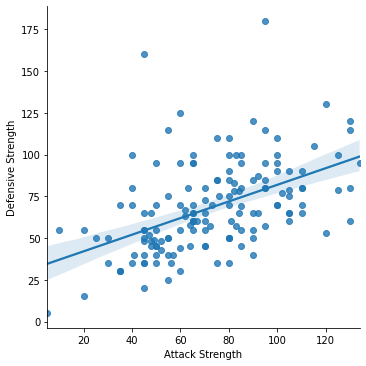

In [11]:
#default scatterplot : et's compare the Attack and Defense stats for our Pokémon
sns.lmplot(x='Attack Strength', y='Defensive Strength', data=data)

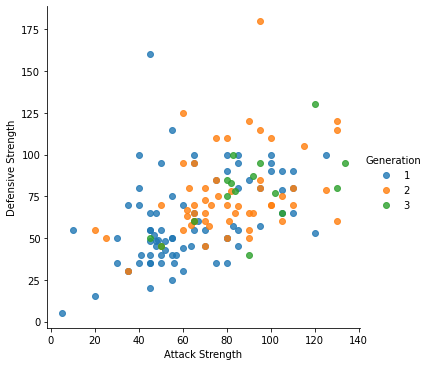

In [12]:
#Tweaking with scatter plot

sns.lmplot(x='Attack Strength', y='Defensive Strength', data=data,
          fit_reg = False, #Deleting regression line
           hue="Generation");   #Separating as per pokemon generation

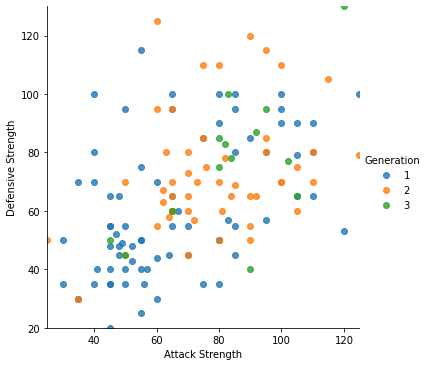

In [13]:
#More of the density falls on 40-120 mark , we can alter the limits of axes with the help of matplotlib:

sns.lmplot(x='Attack Strength', y='Defensive Strength', data=data,
          fit_reg = False, #Deleting regression line
           hue="Generation");   #Separating as per pokemon generation

plt.ylim(20,130);
plt.xlim(25,125);   #we are able to see a more focussed graph now

(-34.0, 714.0)

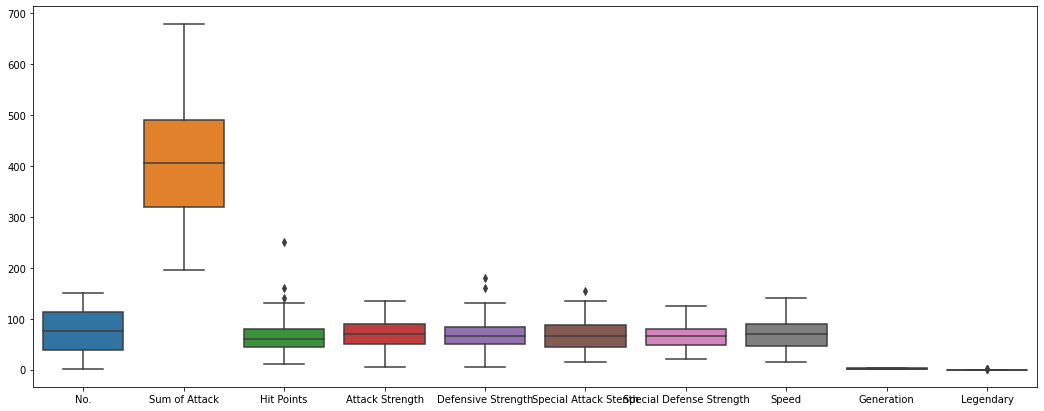

In [14]:
#seeing variations with boxplot
plt.figure(figsize=(18,7));    #i need to have more width as compared to height for more visibility of labels
                                
sns.boxplot(data=data);
plt.ylim()

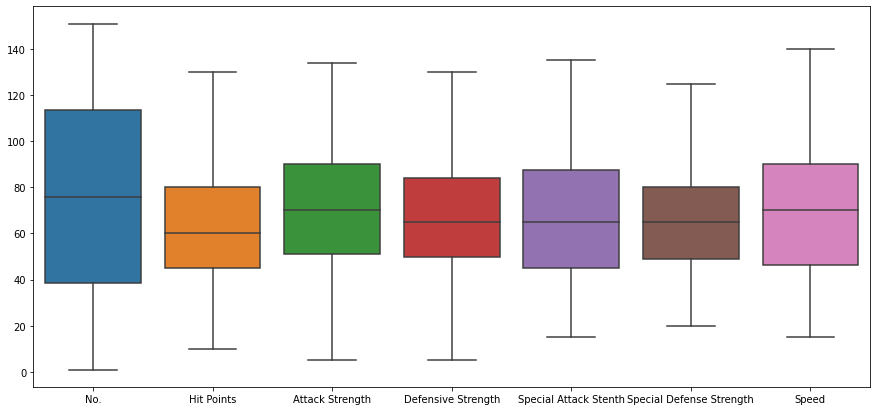

In [15]:
#We can remove the Total since we have individual stats.
#We can remove the Stage and Legendary columns because they aren't combat stats.

plt.figure(figsize=(15,7));

# Pre-format DataFrame
stats_data = data.drop(['Sum of Attack', 'Generation', 'Legendary'], axis=1);
 
# New boxplot using stats_df
sns.boxplot(data=stats_data,
            showfliers=False);   #Removing outliers

sns.set_style("whitegrid")

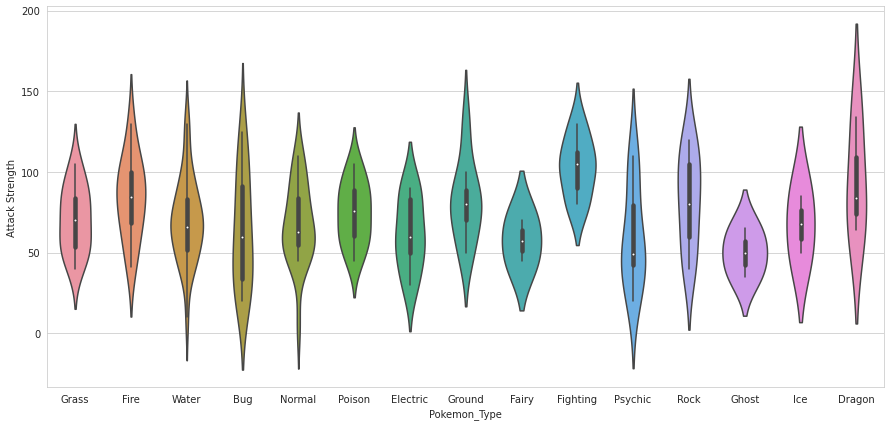

In [16]:
#Plotting violin plot : alternatives to box plots: show the distribution (through the thickness of the violin) 
                #instead of only the summary statistics.
    
# distribution of Attack by Pokémon's primary type
plt.figure(figsize=(15,7));
sns.violinplot(x=data.Pokemon_Type, y = data["Attack Strength"]);

In [17]:
data.head()

,No.,Name,Pokemon_Type,PokemonType2,Sum of Attack,Hit Points,Attack Strength,Defensive Strength,Special Attack Stenth,Special Defense Strength,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [18]:
# using Bulbapedia to create a new color palette:

#Bulbapedia : https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]


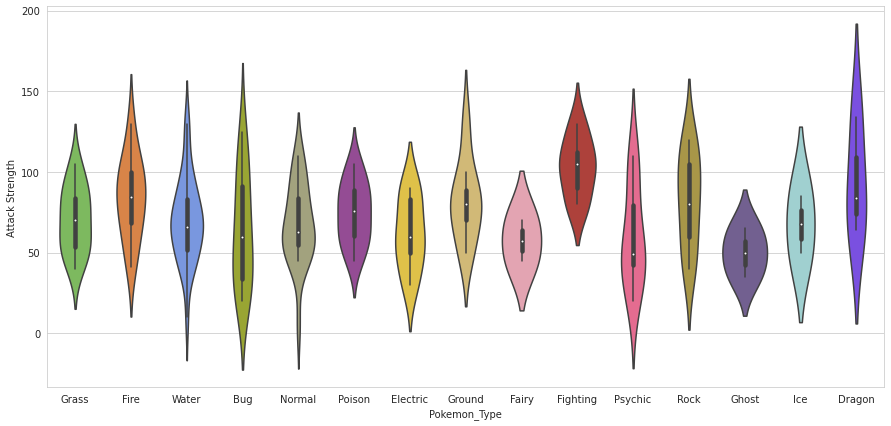

In [19]:
#making modification in violin plot as per pokemon type's color:

plt.figure(figsize=(15,7));
sns.violinplot(x=data.Pokemon_Type, 
               y = data["Attack Strength"],
              palette = pkmn_type_colors);


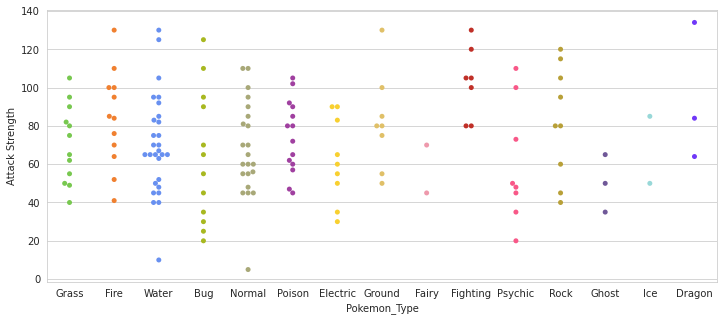

In [20]:
#Using swarmplots : visualization will show each point, while "stacking" those with similar values:

plt.figure(figsize=(12,5));
sns.swarmplot(x=data.Pokemon_Type,y=data["Attack Strength"],palette=pkmn_type_colors);

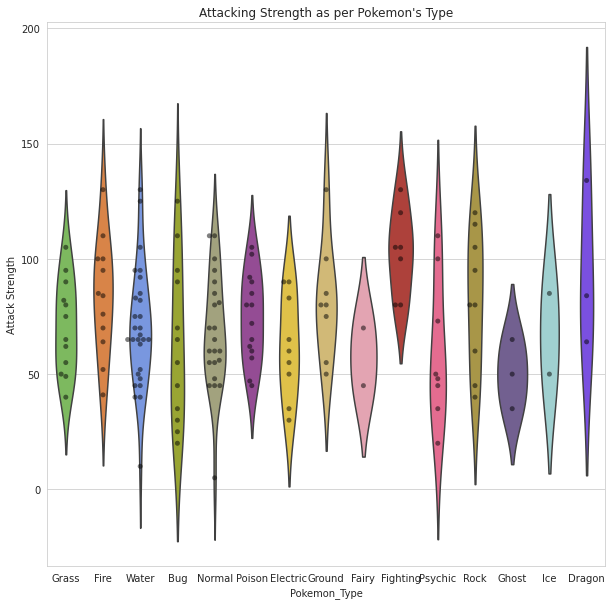

In [21]:
#Overlying plots

plt.figure(figsize=(10,10))

sns.violinplot(x=data.Pokemon_Type, 
               y = data["Attack Strength"],
               inner=None, # Remove the bars inside the violins
              palette = pkmn_type_colors);

sns.swarmplot(x="Pokemon_Type",
              y="Attack Strength",
              data=data,
              color='black', #making points black
              alpha=0.5); #making points slightly transparent:Remember alpha value must be float,dont keep in ""

#References for seaborn colors : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/
plt.title("Attacking Strength as per Pokemon's Type");

In [22]:
#all of our stats are in separate columns. Instead, lets "melt" them into one column:use Pandas's melt() function.

#It takes 3 arguments:
# First, the DataFrame to melt.
# Second, ID variables to keep (Pandas will melt all of the other ones).
# Finally, a name for the new, melted variable.

melted_df = pd.melt(data,
                    id_vars=["No.","Name","Pokemon_Type","PokemonType2","Sum of Attack","Hit Points"], #Variables to keep
                    var_name= "Stats"); #Name of melted variable
                   
melted_df.Stats

#All the remaining 7 of the stat columns have been "melted" into one, 
#the new Stat column indicates the original stat :[Attack Strength, Defensive Strength,Special Attack Stenth,
                                                #Special Defense Strength,Speed,Generation,Legendary)
#For example:its hard to see , but Bulbasaur now has 7 rows of data.

0       Attack Strength
1       Attack Strength
2       Attack Strength
3       Attack Strength
4       Attack Strength
             ...       
1052          Legendary
1053          Legendary
1054          Legendary
1055          Legendary
1056          Legendary
Name: Stats, Length: 1057, dtype: object

In [23]:
print(melted_df.head())

   No.        Name Pokemon_Type  ... Hit Points            Stats  value
0    1   Bulbasaur        Grass  ...         45  Attack Strength     49
1    2     Ivysaur        Grass  ...         60  Attack Strength     62
2    3    Venusaur        Grass  ...         80  Attack Strength     82
3    4  Charmander         Fire  ...         39  Attack Strength     52
4    5  Charmeleon         Fire  ...         58  Attack Strength     64

[5 rows x 8 columns]


In [24]:
melted_df.columns

Index(['No.', 'Name', 'Pokemon_Type', 'PokemonType2', 'Sum of Attack',
       'Hit Points', 'Stats', 'value'],
      dtype='object')

In [25]:
print((melted_df).shape)

(1057, 8)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


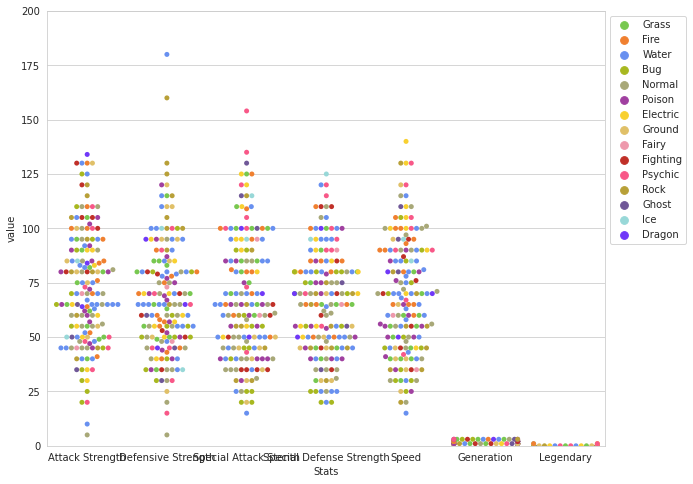

In [26]:
# make a swarm plot with melted_df

plt.figure(figsize=(10,8))
sns.swarmplot("Stats",y="value",hue="Pokemon_Type",data= melted_df,
              #Separate points by hue : split parameters has been renamed as dodge
              palette=pkmn_type_colors) #Use Pokemon palette);

# Adjust the y-axis
plt.ylim(0, 200);
 
#Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2);

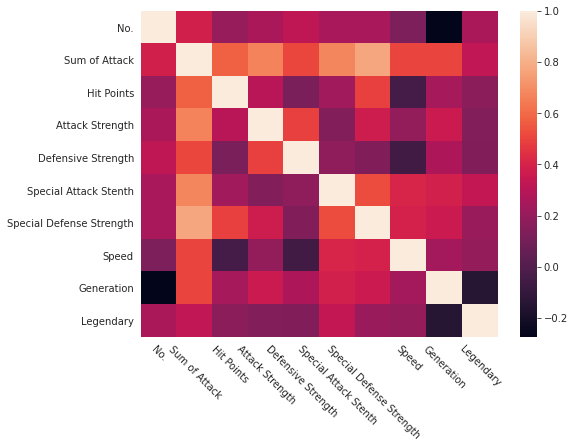

In [27]:
#Heatmaps help you visualize matrix-like data
plt.figure(figsize=(8,6));
sns.heatmap(data.corr());

# Rotate x-labels with the help of matplotlib
plt.xticks(rotation=-45);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 360x1080 with 0 Axes>

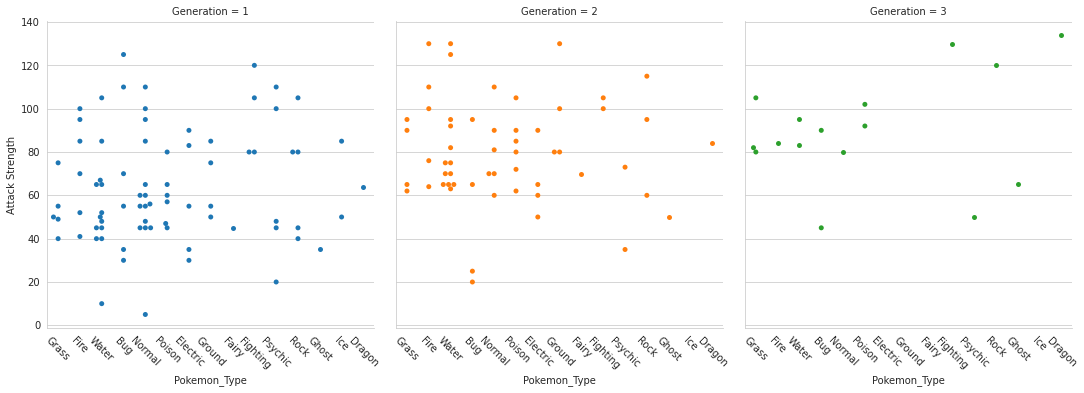

In [28]:
#Factor plots make it easy to separate plots by categorical classes.

plt.figure(figsize=(5,15))
factplot= sns.factorplot(x="Pokemon_Type",y="Attack Strength",data=data,hue="Generation",col="Generation",kind="swarm");

factplot.set_xticklabels(rotation=-45)
plt.show()


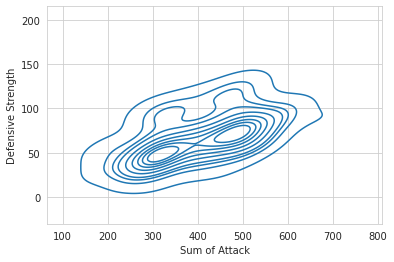

In [29]:
#Density plots display the distribution between two variables.
sns.kdeplot(x=data["Sum of Attack"],y=data["Defensive Strength"])
plt.show()

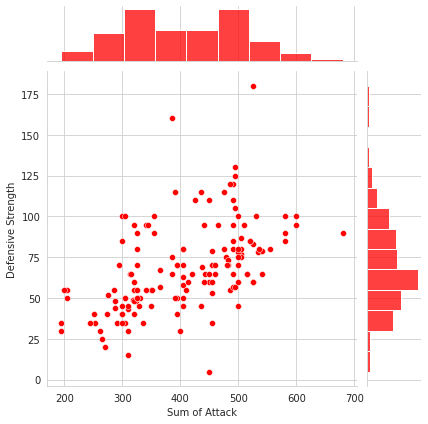

In [30]:
#Joint distribution plots combine information from scatter plots and histograms to give us
                #detailed information for bi-variate distributions.

sns.jointplot(x=data["Sum of Attack"],y=data["Defensive Strength"],color="Red");

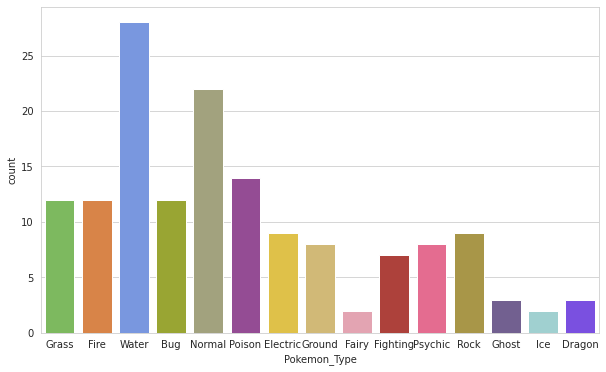

In [31]:
#Bar plots help you visualize the distributions of categorical variables
#countplot is a type of barplot

plt.figure(figsize=(10,6));
sns.countplot(x=data.Pokemon_Type,palette=pkmn_type_colors);
plt.show()

In [32]:
dist = data['Legendary'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Diabetes Outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()


NameError: ignored